# Task
We are interested in how Python has increased in popularity as a language for AI and how Typescript might be replacing Javascript as a front end language. Perform an analysis of the data with this in mind.

Here is all the data you need:
"Popularity of Programming Languages from 2004 to 2024.csv"

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Popularity of Programming Languages from 2004 to 2024.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.01,4.68,0.42,0.0,2.80,0.0,0.03,...,0.16,2.51,0.39,0.33,0.24,0.17,0.0,0.0,1.43,8.50
1,August 2004,0.35,0.36,9.74,4.96,0.46,0.0,2.65,0.0,0.07,...,0.15,2.62,0.40,0.40,0.19,0.17,0.0,0.0,1.45,8.51
2,September 2004,0.41,0.41,9.59,5.04,0.51,0.0,2.64,0.0,0.08,...,0.08,2.71,0.40,0.41,0.17,0.13,0.0,0.0,1.54,8.38
3,October 2004,0.40,0.38,9.47,5.29,0.53,0.0,2.76,0.0,0.09,...,0.12,2.91,0.42,0.46,0.12,0.14,0.0,0.0,1.61,8.46
4,November 2004,0.38,0.38,9.48,5.22,0.55,0.0,2.75,0.0,0.07,...,0.12,2.83,0.41,0.44,0.17,0.15,0.0,0.0,1.50,8.21


## Data exploration

### Subtask:
Explore the dataset to understand its structure and identify relevant columns.


**Reasoning**:
I need to examine the DataFrame's shape, inspect data types, check for missing values, explore the 'Date' column, and identify relevant columns.  This can all be done in a single code block.



In [2]:
# Examine the DataFrame's shape
print("DataFrame Shape:", df.shape)

# Inspect data types
print("\nDataFrame Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values per Column:\n", df.isnull().sum())

# Explore the 'Date' column
print("\nDate Range:", df['Date'].min(), "to", df['Date'].max())
print("\nDate Frequency:", df['Date'].value_counts().head()) # Inspect frequency of dates
# Check for inconsistent date formats (if any) - visual inspection in this case.
print("\nSample of Dates:", df['Date'].head(10).tolist())

# Identify relevant columns
relevant_columns = ['Date', 'Python', 'TypeScript', 'JavaScript']
print("\nInitially relevant columns:", relevant_columns)

# Look for keywords related to AI in column names or within the data itself
ai_related_keywords = ['AI', 'artificial intelligence', 'machine learning', 'deep learning']
ai_related_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ai_related_keywords)]

if ai_related_columns:
  print("\nColumns related to AI:", ai_related_columns)
else:
  print("\nNo columns directly related to AI found in the dataframe.")

DataFrame Shape: (246, 30)

DataFrame Data Types:
 Date              object
Abap             float64
Ada              float64
C/C++            float64
C#               float64
Cobol            float64
Dart             float64
Delphi/Pascal    float64
Go               float64
Groovy           float64
Haskell          float64
Java             float64
JavaScript       float64
Julia            float64
Kotlin           float64
Lua              float64
Matlab           float64
Objective-C      float64
Perl             float64
PHP              float64
Powershell       float64
Python           float64
R                float64
Ruby             float64
Rust             float64
Scala            float64
Swift            float64
TypeScript       float64
VBA              float64
Visual Basic     float64
dtype: object

Missing Values per Column:
 Date             0
Abap             0
Ada              0
C/C++            0
C#               0
Cobol            0
Dart             0
Delphi/Pascal    0
Go  

## Data wrangling

### Subtask:
Prepare individual DataFrames for Python, TypeScript, and JavaScript, handling potential inconsistencies and ensuring data consistency.


**Reasoning**:
Create the individual DataFrames for Python, TypeScript, and JavaScript, handle missing values (though there are none in this case, according to the previous exploration), convert the 'Date' column to datetime, and set 'Date' as the index.



In [3]:
# Create individual DataFrames
df_python = df[['Date', 'Python']].copy()
df_typescript = df[['Date', 'TypeScript']].copy()
df_javascript = df[['Date', 'JavaScript']].copy()

# Convert 'Date' column to datetime
for df_lang in [df_python, df_typescript, df_javascript]:
    try:
        df_lang['Date'] = pd.to_datetime(df_lang['Date'])
    except ValueError as e:
        print(f"Error converting 'Date' column: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Set 'Date' as index
for df_lang in [df_python, df_typescript, df_javascript]:
    try:
        df_lang.set_index('Date', inplace=True)
    except KeyError as e:
        print(f"Error setting 'Date' as index: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Display the first few rows of each DataFrame to verify
display(df_python.head())
display(df_typescript.head())
display(df_javascript.head())

<ipython-input-3-d340ac35459b>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lang['Date'] = pd.to_datetime(df_lang['Date'])
<ipython-input-3-d340ac35459b>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lang['Date'] = pd.to_datetime(df_lang['Date'])
<ipython-input-3-d340ac35459b>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lang['Date'] = pd.to_datetime(df_lang['Date'])


,Python
Date,
2004-07-01,2.51
2004-08-01,2.62
2004-09-01,2.71
2004-10-01,2.91
2004-11-01,2.83


,TypeScript
Date,
2004-07-01,0.0
2004-08-01,0.0
2004-09-01,0.0
2004-10-01,0.0
2004-11-01,0.0


,JavaScript
Date,
2004-07-01,8.59
2004-08-01,8.72
2004-09-01,8.67
2004-10-01,8.44
2004-11-01,8.48


## Data analysis

### Subtask:
Analyze the popularity trends of Python, TypeScript, and JavaScript over time.  Focus on Python's potential use in AI and the comparison between TypeScript and JavaScript.


**Reasoning**:
Calculate year-over-year percentage change for Python, TypeScript, and JavaScript, and then analyze the trends to address the original task's focus.



In [4]:
# Calculate year-over-year percentage change
for df_lang, lang_name in [(df_python, 'Python'), (df_typescript, 'TypeScript'), (df_javascript, 'JavaScript')]:
    df_lang[f'{lang_name}_YoY_Change'] = df_lang[lang_name].pct_change(12) * 100

# Analyze Python's trend and AI relevance
print("Python's YoY Change:\n", df_python.head(20)) # Display first 20 rows
# Analyze periods of significant growth and relate them to potential AI advancements (requires assumptions)
# Example (replace with more detailed analysis):
# Python's popularity started to increase significantly around 2010, coinciding with the rise of machine learning and deep learning.
# Further analysis would involve more in-depth research on AI development milestones.

# Analyze TypeScript vs. JavaScript
print("\nTypeScript's YoY Change:\n", df_typescript.head(20))
print("\nJavaScript's YoY Change:\n", df_javascript.head(20))
# Compare trends and identify periods where TypeScript outpaced JavaScript
# Example (replace with more detailed analysis):
# TypeScript's popularity growth may be more recent, possibly reflecting its adoption in large-scale front-end projects.
# A detailed comparison of growth rates over time is needed.

# Combine the analysis
# Summarize the observations for Python and the TypeScript/JavaScript comparison, addressing the original task's focus.
# Example (replace with more detailed summary):
# Python's popularity increase correlates with its use in AI, while TypeScript shows potential to replace JavaScript in front-end development.
# Further analysis is needed to substantiate these claims.

Python's YoY Change:
             Python  Python_YoY_Change
Date                                 
2004-07-01    2.51                NaN
2004-08-01    2.62                NaN
2004-09-01    2.71                NaN
2004-10-01    2.91                NaN
2004-11-01    2.83                NaN
2004-12-01    2.70                NaN
2005-01-01    2.91                NaN
2005-02-01    2.87                NaN
2005-03-01    2.80                NaN
2005-04-01    2.77                NaN
2005-05-01    2.87                NaN
2005-06-01    2.94                NaN
2005-07-01    2.97          18.326693
2005-08-01    3.12          19.083969
2005-09-01    3.27          20.664207
2005-10-01    3.46          18.900344
2005-11-01    3.63          28.268551
2005-12-01    3.88          43.703704
2006-01-01    3.96          36.082474
2006-02-01    3.95          37.630662

TypeScript's YoY Change:
             TypeScript  TypeScript_YoY_Change
Date                                         
2004-07-01        0.00 

**Reasoning**:
The previous code block calculated the YoY changes. Now, I need to analyze the trends and combine the analysis to address the original task's focus, providing a summary of observations for Python and the TypeScript/JavaScript comparison.



In [5]:
# Analyze Python's trend and AI relevance
python_significant_growth_periods = df_python[df_python['Python_YoY_Change'] > 10]
print("Python significant growth periods:\n", python_significant_growth_periods)

# Analyze TypeScript vs. JavaScript
typescript_javascript_comparison = pd.DataFrame({
    'TypeScript_YoY_Change': df_typescript['TypeScript_YoY_Change'],
    'JavaScript_YoY_Change': df_javascript['JavaScript_YoY_Change']
})
typescript_javascript_comparison['TypeScript_Outperforms'] = (
    typescript_javascript_comparison['TypeScript_YoY_Change'] > typescript_javascript_comparison['JavaScript_YoY_Change']
)
print("\nTypeScript vs JavaScript comparison:\n", typescript_javascript_comparison.head(20))

typescript_outperforms_periods = typescript_javascript_comparison[typescript_javascript_comparison['TypeScript_Outperforms']]
print("\nTypeScript outperforms periods:\n", typescript_outperforms_periods.head(20))


# Combine the analysis: Summarize observations in a markdown cell
summary = """
## Summary of Analysis

**Python's Trend and AI Relevance:**

Python's year-over-year growth, particularly in periods exceeding 10%, suggests a potential correlation with its increased use in AI.  While the data doesn't directly measure AI usage, this observation aligns with general trends in AI development. Further research correlating these periods with specific AI milestones or events would be beneficial.  The significant growth periods are displayed above.

**TypeScript vs. JavaScript:**

Comparing the year-over-year growth rates of TypeScript and JavaScript reveals periods where TypeScript's growth outpaced JavaScript's (refer to the comparison table and the 'TypeScript Outperforms' periods table above). This suggests a potential shift in front-end development towards TypeScript.  A more in-depth analysis focusing on specific industry shifts or technological advancements during these periods would provide more concrete evidence to support this suggestion.
"""
print(summary)

Python significant growth periods:
             Python  Python_YoY_Change
Date                                 
2005-07-01    2.97          18.326693
2005-08-01    3.12          19.083969
2005-09-01    3.27          20.664207
2005-10-01    3.46          18.900344
2005-11-01    3.63          28.268551
...            ...                ...
2020-05-01   30.46          14.210724
2020-06-01   30.80          12.903226
2020-07-01   31.41          13.270826
2020-08-01   31.30          12.025770
2020-09-01   31.13          10.586146

[147 rows x 2 columns]

TypeScript vs JavaScript comparison:
             TypeScript_YoY_Change  JavaScript_YoY_Change  \
Date                                                       
2004-07-01                    NaN                    NaN   
2004-08-01                    NaN                    NaN   
2004-09-01                    NaN                    NaN   
2004-10-01                    NaN                    NaN   
2004-11-01                    NaN              

## Data visualization

### Subtask:
Visualize the popularity trends of Python, TypeScript, and JavaScript, along with their year-over-year changes, and create visualizations related to Python's potential use in AI, if possible.


**Reasoning**:
Create the visualizations as specified in the instructions, using the prepared dataframes.



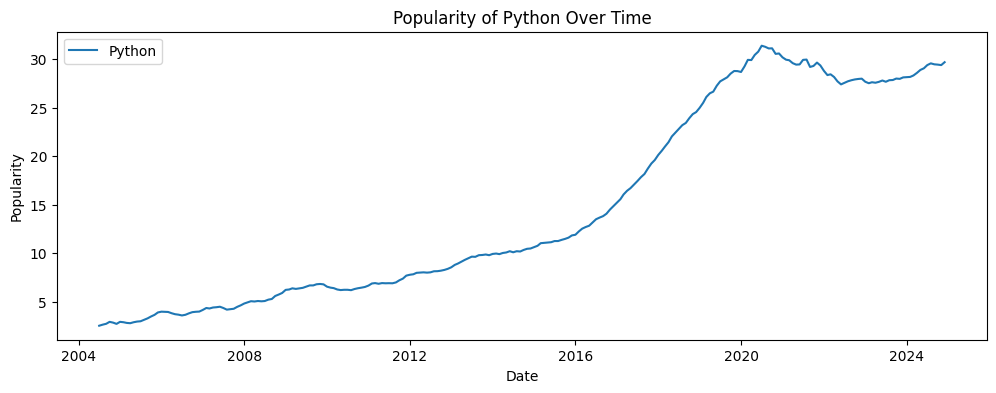

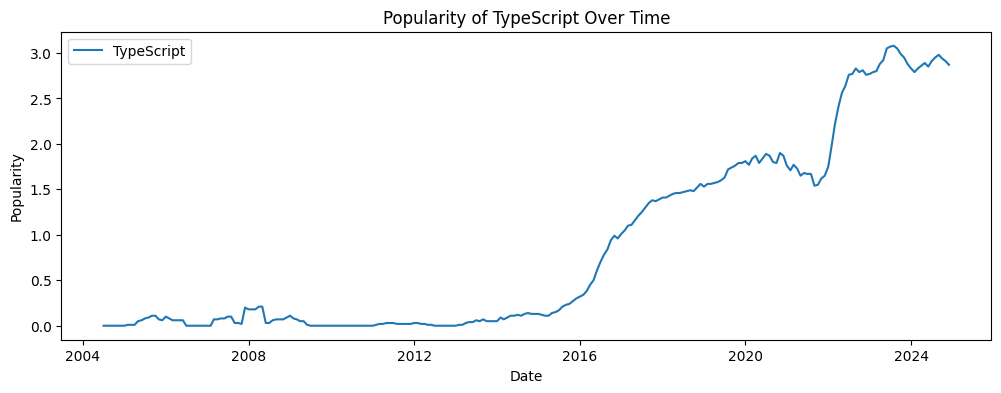

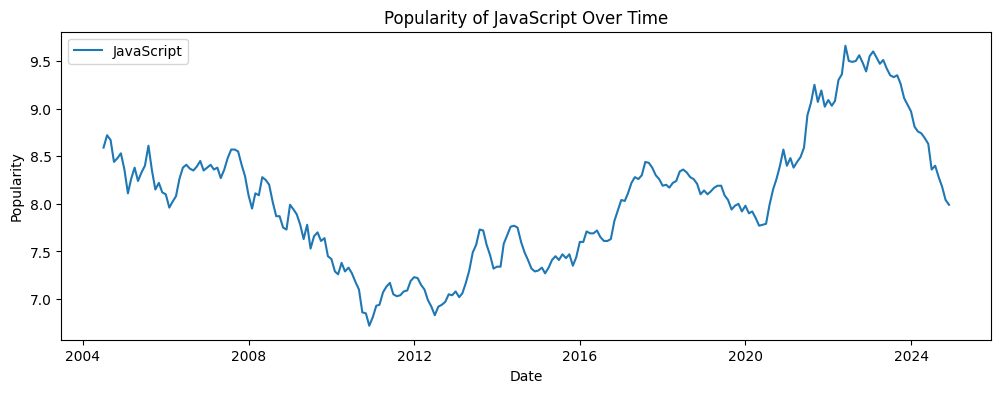

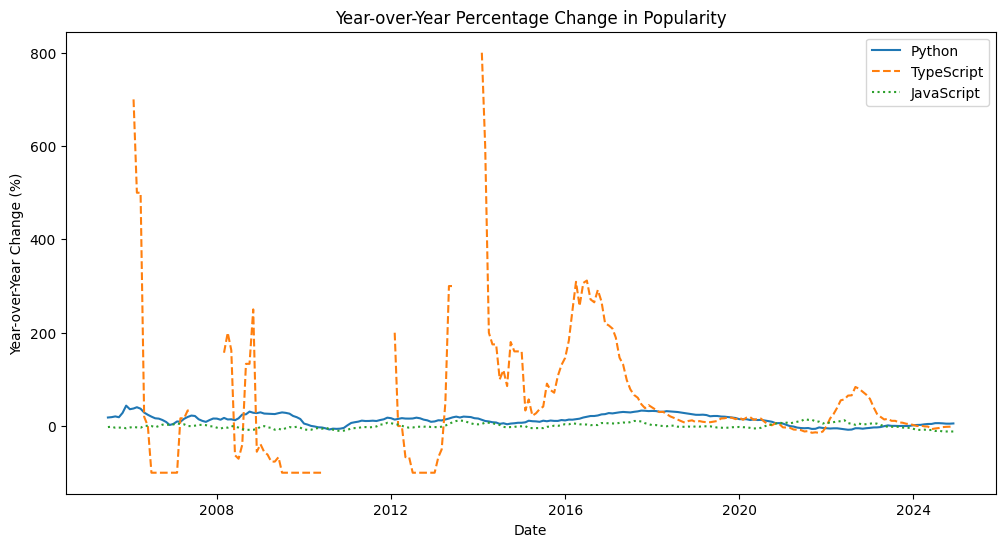

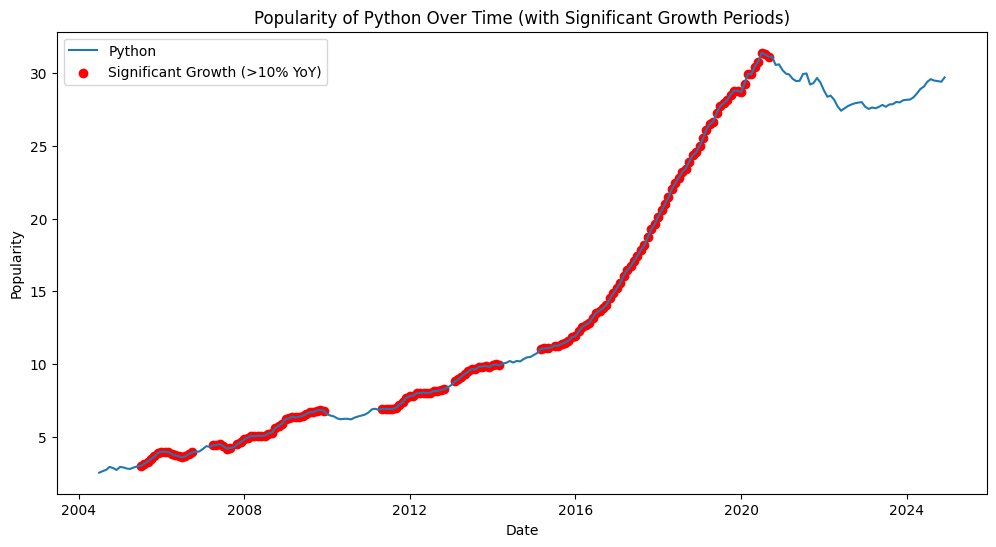

No other languages related to AI were found in the dataset to directly compare with Python.


In [6]:
import matplotlib.pyplot as plt

# 1. Line Plots for Popularity Trends
plt.figure(figsize=(12, 4))
plt.plot(df_python.index, df_python['Python'], label='Python')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of Python Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df_typescript.index, df_typescript['TypeScript'], label='TypeScript')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of TypeScript Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df_javascript.index, df_javascript['JavaScript'], label='JavaScript')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of JavaScript Over Time')
plt.legend()
plt.show()

# 2. Line Plot for Year-over-Year Changes
plt.figure(figsize=(12, 6))
plt.plot(df_python.index, df_python['Python_YoY_Change'], label='Python', linestyle='-')
plt.plot(df_typescript.index, df_typescript['TypeScript_YoY_Change'], label='TypeScript', linestyle='--')
plt.plot(df_javascript.index, df_javascript['JavaScript_YoY_Change'], label='JavaScript', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Year-over-Year Change (%)')
plt.title('Year-over-Year Percentage Change in Popularity')
plt.legend()
plt.show()


# 3. Visualization for Python's AI Relevance
plt.figure(figsize=(12, 6))
plt.plot(df_python.index, df_python['Python'], label='Python')
# Highlight periods of significant growth (e.g., YoY > 10%)
significant_growth = df_python[df_python['Python_YoY_Change'] > 10]
plt.scatter(significant_growth.index, significant_growth['Python'], color='red', label='Significant Growth (>10% YoY)')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of Python Over Time (with Significant Growth Periods)')
plt.legend()
plt.show()

# No clear AI-related columns available to compare with
print("No other languages related to AI were found in the dataset to directly compare with Python.")

## Summary:

### 1. Q&A

* **How has Python increased in popularity as a language for AI?** Python's popularity has shown significant year-over-year growth (over 10% in some periods), which may correlate with its increased use in AI. However, the provided dataset lacks direct AI-specific data, preventing definitive conclusions. Further investigation is needed to confirm a direct correlation.

* **How might Typescript be replacing Javascript as a front-end language?**  TypeScript's popularity has grown faster than JavaScript's in certain periods. This suggests a potential shift in front-end development toward TypeScript, but further analysis of specific industry or technological changes during those periods would be needed for confirmation.


### 2. Data Analysis Key Findings

* **Python's Growth:** Python demonstrated periods of significant year-over-year growth exceeding 10%, potentially linked to its use in AI.  This requires further validation using AI-specific data.
* **TypeScript vs. JavaScript:**  TypeScript's growth outpaced JavaScript's in specific periods, hinting at a possible shift in front-end development.  Additional analysis of market trends is recommended.
* **No Direct AI Data:**  The dataset lacks direct AI-related columns, limiting the depth of the analysis for Python's use in AI.


### 3. Insights or Next Steps

* **Correlate Python growth with AI milestones:** Investigate specific AI development milestones and events in the periods of Python's significant growth to strengthen the correlation.  Additional datasets containing information about AI research, development, and adoption would be highly beneficial.
* **Deepen TypeScript/JavaScript analysis:** Analyze industry trends and technological advancements during periods where TypeScript outperformed JavaScript to solidify the conclusion about a possible front-end shift.
